<a href="https://colab.research.google.com/github/Jtrep10/NTK_Experiments/blob/main/NKT_simple_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages.

In [133]:
import torch
import torch.nn as nn
import numpy as np
import random
import typing
import matplotlib.pyplot as plt
torch.use_deterministic_algorithms=True

Initialize model using torch. Need to handle set seed each time to manage randomness.

In [134]:
def init_model(n:int,seed:int,activation:nn.Module)->nn.Sequential:
  torch.manual_seed(seed)
  random.seed(seed)
  net = nn.Sequential(
    nn.Linear(2,n),
    activation(),
    nn.Linear(n,n),
    activation(),
    nn.Linear(n,n),
    activation(),
    nn.Linear(n,1)
)
  return net

Helpful functions. Get a list of model parameters or gradients associated with parameters. Also get 2x1 tensor input matching Jacot paper.

In [135]:
def get_grads(net):
  theta = [param.grad.flatten() for name,param in net.named_parameters()]
  theta = torch.concatenate(theta)
  return theta

def get_params(net):
  theta = [param.flatten() for name,param in net.named_parameters()]
  theta = torch.concatenate(theta)
  return theta

def input(gamma:float)->torch.Tensor:
  gamma=torch.Tensor([gamma])
  x=torch.tensor([torch.cos(gamma),torch.sin(gamma)])
  return x

Function to get NKT. Here, I just used the gradients automatically calculated by torch. Torch calculates gradients of the loss function with respect to the parameters, so I used an identity mapping as the loss to get gradient of the output with respect to the parameters. The NKT is just the inner product of the gradients for each input.

In [146]:
def NKT(n:int,seed:int,act:nn.Module,x1:torch.Tensor,x2:torch.Tensor)->torch.Tensor:
  loss_fn=nn.Identity()

  net=init_model(n,seed,act)
  out=net.forward(x1)
  loss = loss_fn(out)
  loss.backward()
  theta1=get_grads(net)

  net=init_model(n,seed,nn.ReLU)
  out=net.forward(torch.Tensor(x2))
  loss = loss_fn(out)
  loss.backward()
  theta2=get_grads(net)

  NKT=torch.inner(theta1,theta2)
  return NKT

def get_NKTs(n:int,seed:int,act:nn.Module,ref_x,gamma_spacing:float=0.01)->torch.Tensor:
  gammas=torch.arange(-1,1,gamma_spacing)
  NKTs=[NKT(n,seed,act,input(gamma),ref_x) for gamma in gammas]
  return NKTs

Experiment across 4 seeds with different depths.

Text(0, 0.5, 'NKT')

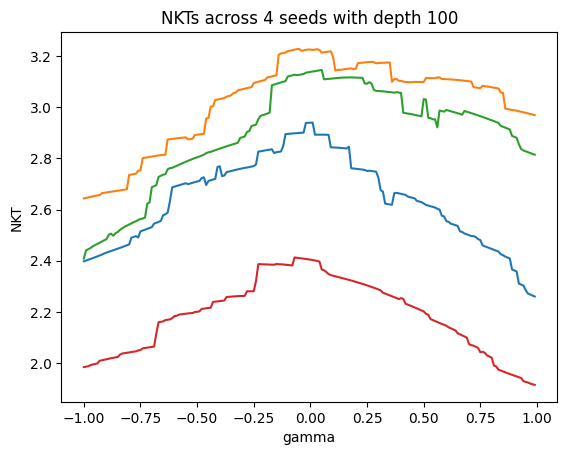

In [147]:
seeds = [0,4,22,42]
n=100
act=nn.ReLU
x_ref=torch.Tensor([1,0])
gammas=torch.arange(-1,1,0.01)

for seed in seeds:
  NKTs=get_NKTs(n,seed,act,x_ref)
  plt.plot(gammas,NKTs)

plt.title(f"NKTs across 4 seeds with depth {n}")
plt.xlabel("gamma")
plt.ylabel("NKT")


Text(0, 0.5, 'NKT')

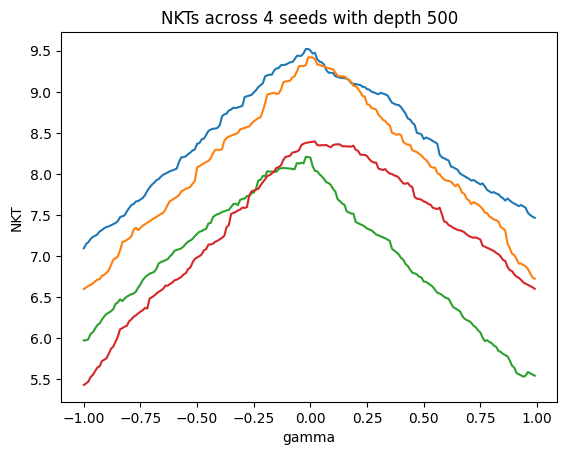

In [148]:
seeds = [0,4,22,42]
n=500
act=nn.ReLU
x_ref=torch.Tensor([1,0])
gammas=torch.arange(-1,1,0.01)

for seed in seeds:
  NKTs=get_NKTs(n,seed,act,x_ref)
  plt.plot(gammas,NKTs)

plt.title(f"NKTs across 4 seeds with depth {n}")
plt.xlabel("gamma")
plt.ylabel("NKT")


Text(0, 0.5, 'NKT')

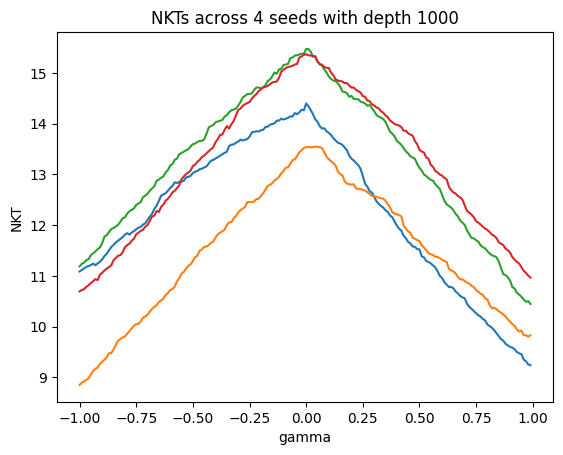

In [149]:
seeds = [0,4,22,42]
n=1000
act=nn.ReLU
x_ref=torch.Tensor([1,0])
gammas=torch.arange(-1,1,0.01)

for seed in seeds:
  NKTs=get_NKTs(n,seed,act,x_ref)
  plt.plot(gammas,NKTs)

plt.title(f"NKTs across 4 seeds with depth {n}")
plt.xlabel("gamma")
plt.ylabel("NKT")
